# Comparing inference results from different methods

In [1]:
import pandas as pd
from chainconsumer import ChainConsumer, Chain
import matplotlib.pyplot as plt


In [11]:
### Grid Sampling ###

# Omega_M for flat universe
df1 = pd.read_csv("omega_m-flat_universe_Grid_Sampling.csv")

# Omega_M and Omega_Lambda for curved universe
df2 = pd.read_csv("omega_m_omega_l-curved_universe_Grid_Sampling.csv")

# Omega_M from analytical marginalization over h
df3 = pd.read_csv("omega_m_from_marginalization_Grid_Sampling.csv")

# Omega_M, Omega_lambda and h for curved universe
df4 = pd.read_csv("h_omega_m_omega_l-curved_universe_Grid_Sampling.csv")


### EMCEE Sampling ###

# Omega_M and Omega_Lambda for curved universe
df5 = pd.read_csv("omega_m_omega_l-curved_universe_EMCEE.csv") 

# Omega_M, Omega_lambda and h for curved universe
df6 = pd.read_csv("h_omega_m_omega_l-curved_universe_EMCEE.csv") 


### $\Omega_M$ (flat universe) vs $\Omega_M$ (marginalization over h)

'\n# Add the error bars as small horizontal lines at the top and bottom of the plot\n\nymin, ymax = plt.gca().get_ylim()\n\nplt.errorbar(\n    omega_m_central,      # X-coordinate of the central value\n    ymax,                # Y-coordinate (top of the plot)\n    xerr=omega_m_error_left,   # Error range for X (horizontal error bar)\n    fmt="o",             # No connecting line, just points for error bars\n    color="blue",        # Color of the error bars\n    capsize=5,           # Size of the caps at the ends of error bars\n)\n\nplt.errorbar(\n    omega_m_central,      # X-coordinate of the central value\n    ymin,                # Y-coordinate (bottom of the plot)\n    xerr=omega_m_error_right,   # Error range for X (horizontal error bar)\n    fmt="o",             # No connecting line, just points for error bars\n    color="blue",        # Color of the error bars\n    capsize=5,           # Size of the caps at the ends of error bars\n)'

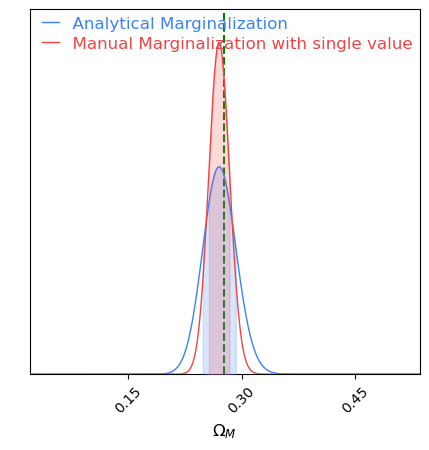

In [13]:
'''c1 = ChainConsumer()
c1.add_chain(Chain(samples=df1, grid=True, name="\Omega_M for flat universe"))

fig = c1.plotter.plot()
#plt.legend("\Omega_M for flat universe", loc="upper right")
# After plotting, manually add a legend using the chain names
handles, labels = plt.gca().get_legend_handles_labels()  # Get handles and labels
plt.legend(handles, labels, loc="upper right")  # Add the legend manually

# Show the plot
plt.show()


c2 = ChainConsumer()
c2.add_chain(Chain(samples=df3, grid=True, name="Analytical Marginalization"))
fig = c2.plotter.plot()
'''


c3 = ChainConsumer()
c3.add_chain(Chain(samples=df3, grid=True, name="Analytical Marginalization", color = "blue"))
c3.add_chain(Chain(samples=df1, grid=True, name="Manual Marginalization with single value", color = "red"))
fig = c3.plotter.plot()

# Plot the chains together
#c1.configure(statistics="max", legend=True)
#fig = c3.plotter.plot(figsize=(6, 6))
#fig.savefig("chain_comparison_csv.png", dpi=300)

### Results from paper
omega_m_central = 0.277
omega_m_error_left = 0.021
omega_m_error_right = 0.022
plt.axvline(x=omega_m_central, color="green", linestyle="--", label="Results from paper")
#plt.legend()
'''
# Add the shaded region for the error bounds (0.8 to 1.2)
ymin, ymax = plt.gca().get_ylim()

plt.fill_betweenx(
    [ymin, ymax],                             # y-range (vertical span)
    omega_m_central - omega_m_error_left,            # Left boundary of the shaded region (lower error bound)
    omega_m_central + omega_m_error_right,            # Right boundary (upper error bound)
    color="green", alpha=0.3,                  # Color and transparency of the shaded region
    label='Results from paper'
    #label=f"Error range: ±{theta1_error:.2f}" # Label showing the error
)
'''
'''
# Add the error bars as small horizontal lines at the top and bottom of the plot

ymin, ymax = plt.gca().get_ylim()

plt.errorbar(
    omega_m_central,      # X-coordinate of the central value
    ymax,                # Y-coordinate (top of the plot)
    xerr=omega_m_error_left,   # Error range for X (horizontal error bar)
    fmt="o",             # No connecting line, just points for error bars
    color="blue",        # Color of the error bars
    capsize=5,           # Size of the caps at the ends of error bars
)

plt.errorbar(
    omega_m_central,      # X-coordinate of the central value
    ymin,                # Y-coordinate (bottom of the plot)
    xerr=omega_m_error_right,   # Error range for X (horizontal error bar)
    fmt="o",             # No connecting line, just points for error bars
    color="blue",        # Color of the error bars
    capsize=5,           # Size of the caps at the ends of error bars
)'''


### Grid Sampling vs EMCEE

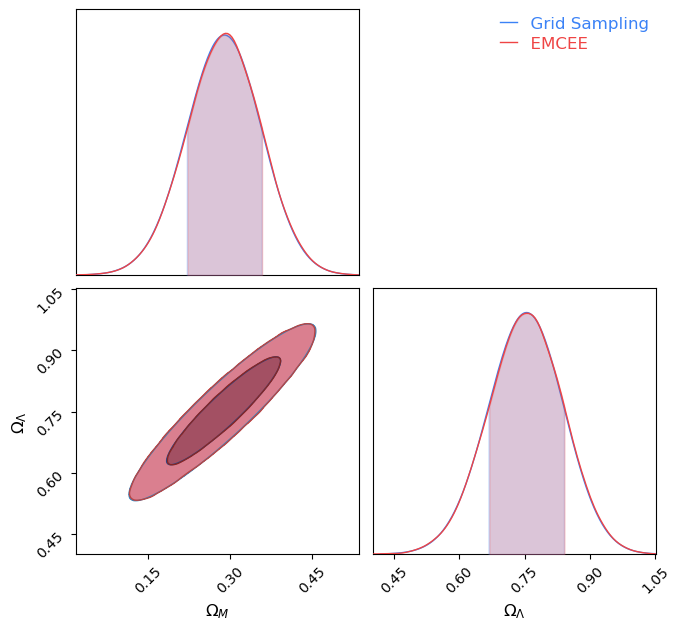

In [5]:
### 2 params

c = ChainConsumer()
c.add_chain(Chain(samples=df2, grid=True, name="Grid Sampling", color = "blue"))
c.add_chain(Chain(samples=df5, name="EMCEE", color = "red"))
fig = c.plotter.plot()

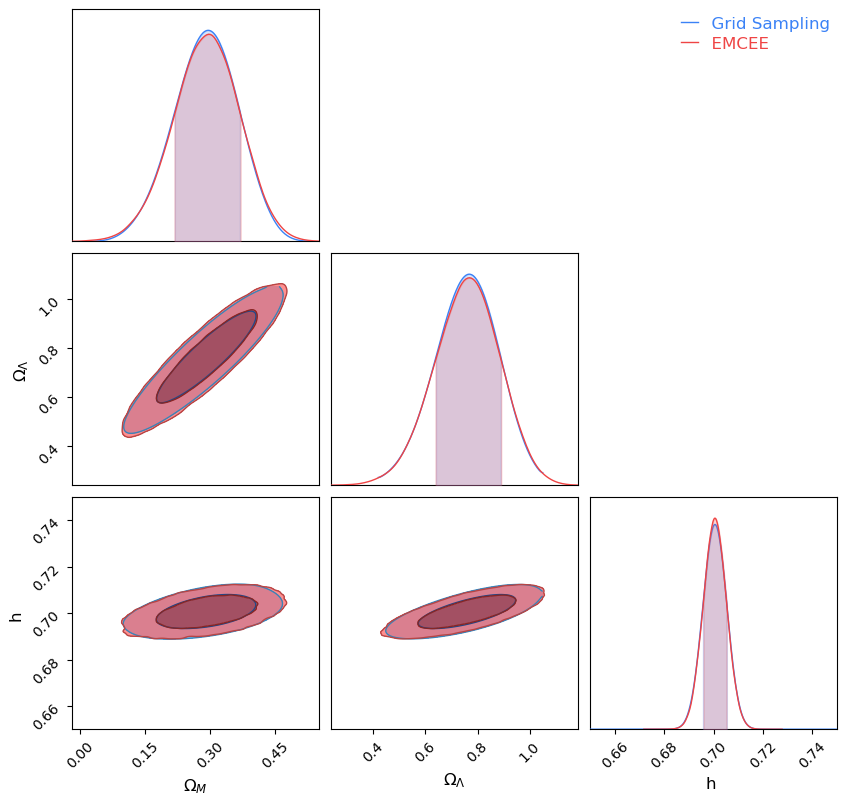

In [8]:
### 3 params

c = ChainConsumer()
c.add_chain(Chain(samples=df4, grid=True, name="Grid Sampling", color = "blue"))
c.add_chain(Chain(samples=df6, name="EMCEE", color = "red"))
fig = c.plotter.plot()